<a href="https://colab.research.google.com/github/aibak365/CSE465_565/blob/main/CSE432_Inclass_exe_Ch4_3_twoLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Generate the Dataset

In this part we want to generate the data point for training.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize']=(10.0,8.0)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'

(-1.0, 1.0)

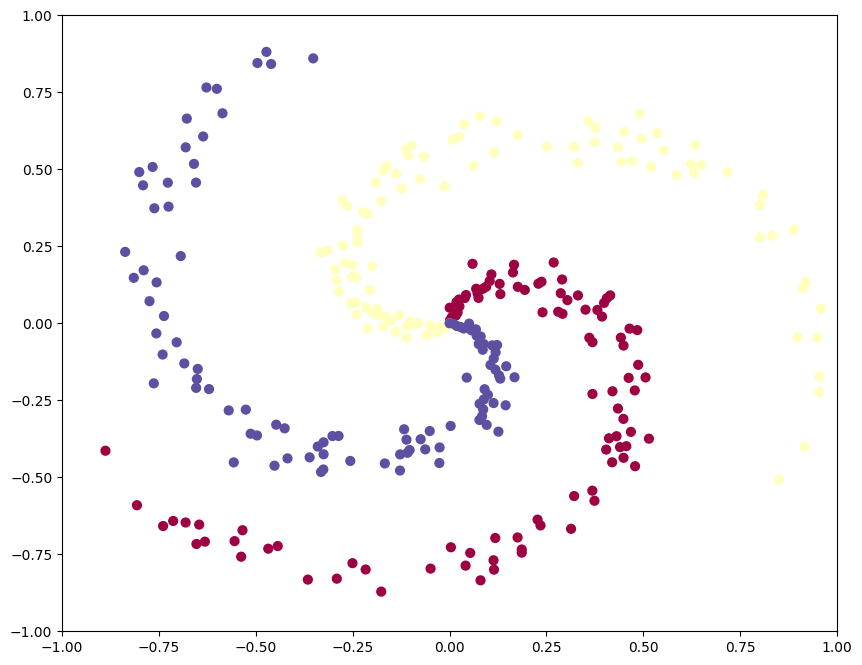

In [2]:
np.random.seed(0)
N=100 # number of data point for each class
D=2  # number of demension
K=3  # number of class
X=np.zeros((N*K,D))#2-D matrix 300 by 2
Y=np.zeros(N*K,dtype='uint8')#1-D vector, Label
for j in range(K):
  ix=range(N*j,N*(j+1))
  r=np.linspace(0.0,1,N)
  t=np.linspace(j*4,(j+1)*4,N)+np.random.randn(N)*0.2
  X[ix]=np.c_[r*np.sin(t),r*np.cos(t)]
  Y[ix]=j
fig=plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y,s=40,cmap=plt.cm.Spectral)
plt.ylim([-1,1])
plt.xlim([-1,1])


In [3]:
print(X.shape)
print(Y.shape)
W=0.01*np.random.randn(D,K)
b=np.zeros((1,K))
scores=np.dot(X,W)
print(scores.shape)
print(b)
print(b.shape)

(300, 2)
(300,)
(300, 3)
[[0. 0. 0.]]
(1, 3)


# Step 2: Linear classifier (one layer NN)

In this part, we want to implement a linear classifier.

## The first step is to initialize the parameter W & b


In [4]:
hidden=100
W=0.01*np.random.randn(D,hidden)
b=np.zeros((1,hidden))
#print(W)
W2=0.01*np.random.randn(hidden,K)
b2=np.zeros((1,K))

# Please read the "Chapter 4.4 Neural Network Demos V2" (Page 37) to understand the following code.

In [5]:

print(W.shape)
print(X.shape)

step_size=1e-0 # learning rate
reg=1e-3 #lambda

num_examples=X.shape[0]
for i in range(10000):
  #forward propagation
  #y=(x*w+b)
  h1=np.dot(X,W)
  h2=b+h1
  h3=np.maximum(0,h2)# Relu
  h4=np.dot(h3,W2)
  h5=h4+b2
  #softmax()
  exp_scores=np.exp(h5)
  s=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)

  #loss
  l1_all=-np.log(s[range(num_examples),Y])
  l1=np.sum(l1_all)/num_examples # data loss
  l3=np.sum(W*W)
  l4=reg*l3 # reg loss
  l5=np.sum(W2*W2)
  l6=reg*l5 #reg loss
  loss=l1+l4+l6
  if i%1000==0:
    print("iteration %d: loss %f" % (i,loss))

  #back propagation
  s[range(num_examples),Y]-=1 #we can not use dh2=s[range(num_examples),Y]-1
  dh5=s
  dh5/=num_examples
  dh4=dh5
  db2=np.sum(dh5, axis=0,keepdims=True)#dh5 #np.sum(dh2, axis=0,keepdims=True)
  dh3=np.dot(dh4,W2.T)
  dW2_data=np.dot(h3.T,dh4)
  dh2=dh3
  dh2[h2<=0]=0
  db=dh2
  dh1=dh2
  dw_data=np.dot(X.T,dh1)
  db=np.sum(dh2, axis=0,keepdims=True)
  dl=1
  dl2=1
  dl3=reg
  dl5=reg
  dw_reg=dl3*W*2
  dw2_reg=2*dl5*W2
  dw=dw_reg+dw_data
  dW2=dw2_reg+dW2_data

  W+=-step_size*dw
  b+=-step_size*db
  W2+=-step_size*dW2
  b2+=-step_size*db2




(2, 100)
(300, 2)
iteration 0: loss 1.098662
iteration 1000: loss 0.423337
iteration 2000: loss 0.386227
iteration 3000: loss 0.364871
iteration 4000: loss 0.359727
iteration 5000: loss 0.358245
iteration 6000: loss 0.357978
iteration 7000: loss 0.357863
iteration 8000: loss 0.357801
iteration 9000: loss 0.357757


In [6]:
hidden_layer=np.maximum(0,np.dot(X,W)+b)
scores=np.dot(hidden_layer,W2)+b2
predicted_class=np.argmax(scores, axis=1)
print("training accuracy: %.2f" % (np.mean(predicted_class==Y)))


training accuracy: 0.97


(-1.8712034092398278, 1.8687965907601756)

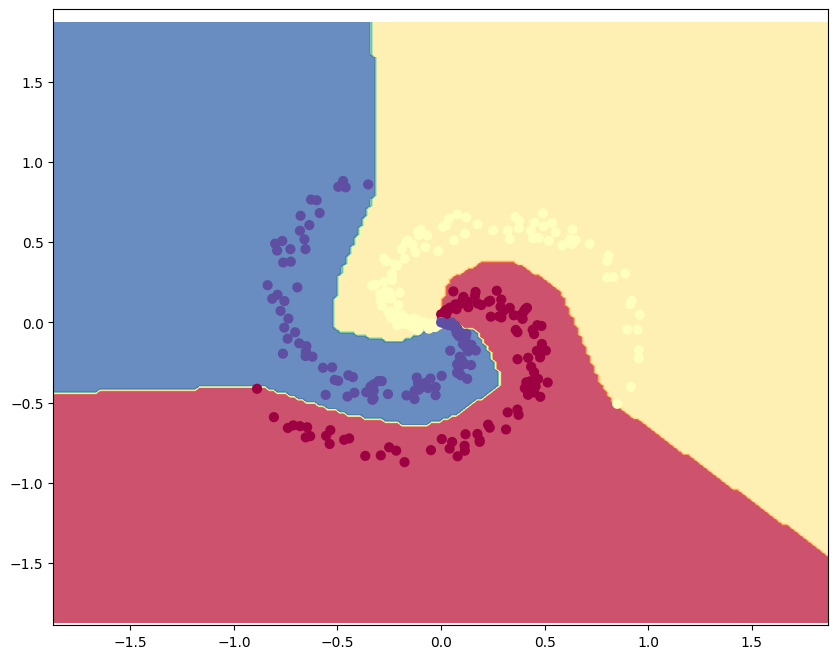

In [7]:
h=0.02
x_min, x_max=X[:,0].min()-1,X[:,0].max()+1
y_min, y_max=X[:,1].min() -1, X[:,1].max()+1

xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
hidden_layer=np.maximum(0,np.dot(np.c_[xx.ravel(),yy.ravel()],W)+b)
Z=np.dot(hidden_layer,W2)+b2
#Z=np.dot(np.maximum(0,np.dot(np.c_[xx.ravel(),yy.ravel()],W)+b),W2)+b2
#Z=np.dot(np.c_[xx.ravel(),yy.ravel()],W)+b
Z=np.argmax(Z,axis=1)
Z=Z.reshape(xx.shape)
fig=plt.figure()

plt.contourf(xx,yy,Z, cmap=plt.cm.Spectral,alpha=0.8)
plt.scatter(X[:,0],X[:,1],c=Y,s=40,cmap=plt.cm.Spectral)
plt.ylim(xx.min(),xx.max())
plt.xlim(yy.min(),yy.max())

# MNIST DATASET

https://colab.research.google.com/drive/1smEmXB196RIx5Q5c-yaR2MNLDRHO9PTM?usp=sharing#scrollTo=x1JRTuxiwqVa

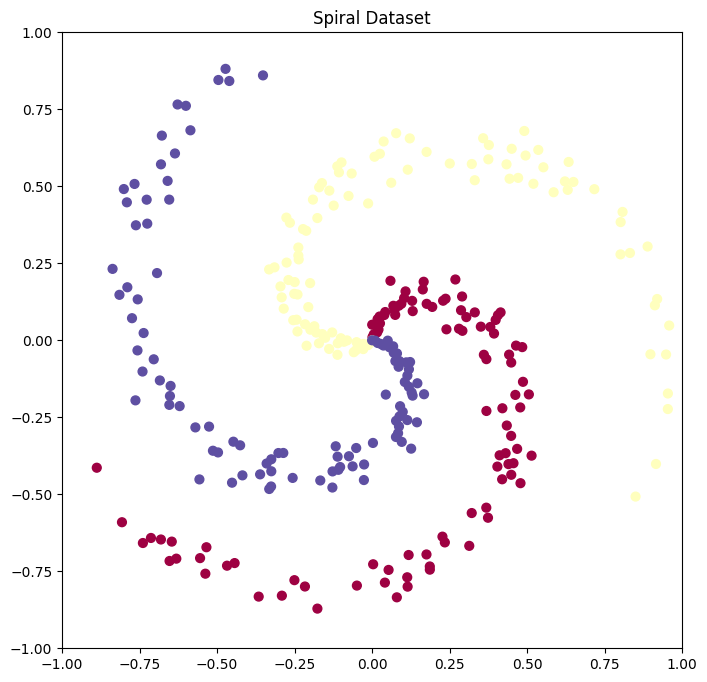

X shape: (300, 2)
Y shape: (300,)
W shape: (2, 100)
b shape: (1, 100)
W2 shape: (100, 100)
b2 shape: (1, 100)
W3 shape: (100, 3)
b3 shape: (1, 3)
Iteration 0: loss 1.0991276757686683
Training accuracy: 0.4533333333333333
Iteration 1000: loss 0.13625090033292434
Training accuracy: 0.98
Iteration 2000: loss 0.1305851702037022
Training accuracy: 0.98
Iteration 3000: loss 0.132160385862233
Training accuracy: 0.9766666666666667
Iteration 4000: loss 0.1255300775881204
Training accuracy: 0.9833333333333333
Iteration 5000: loss 0.1259407417231155
Training accuracy: 0.9833333333333333
Iteration 6000: loss 0.1263863951936324
Training accuracy: 0.9766666666666667
Iteration 7000: loss 0.1234101264749235
Training accuracy: 0.98
Iteration 8000: loss 0.12914596313496848
Training accuracy: 0.9833333333333333
Iteration 9000: loss 0.12603453703147488
Training accuracy: 0.98


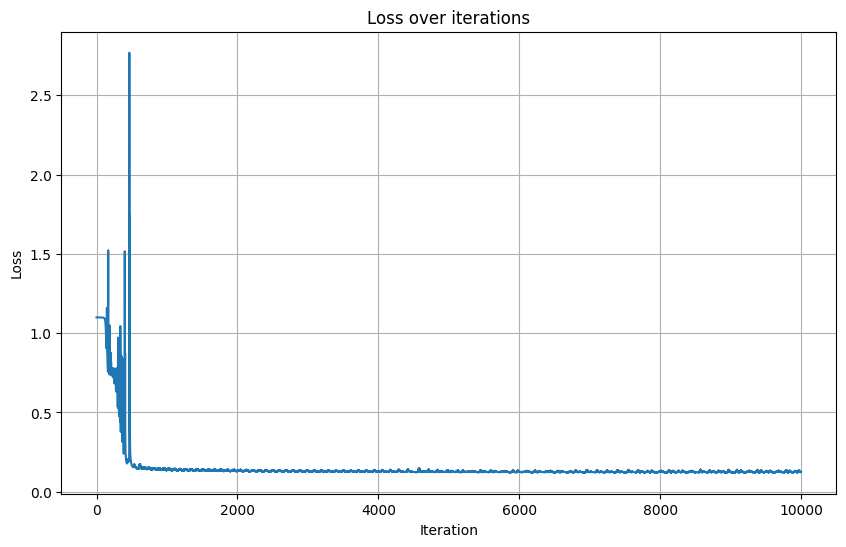

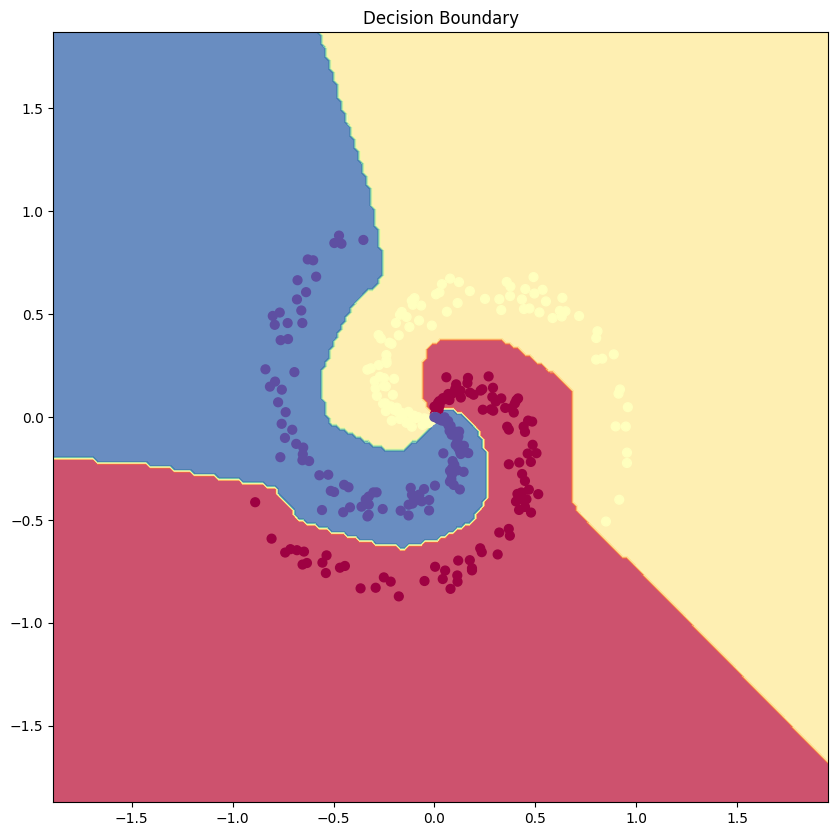

Final training accuracy: 0.98


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate spiral dataset
N = 100  # number of data points for each class
D = 2    # number of dimensions
K = 3    # number of classes
X = np.zeros((N*K, D))  # 2-D matrix 300 by 2
Y = np.zeros(N*K, dtype='uint8')  # 1-D vector, Label

# Create spiral data
for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j

# Visualize the data
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.title('Spiral Dataset')
plt.savefig('spiral_dataset.png')
plt.show()


h1 = 100
h2 = 100

W = 0.01 * np.random.randn(D, h1)
b = np.zeros((1, h1))
W2 = 0.01 * np.random.randn(h1, h2)
b2 = np.zeros((1, h2))
W3 = 0.01 * np.random.randn(h2, K)
b3 = np.zeros((1, K))

print("X shape:", X.shape)
print("Y shape:", Y.shape)
print("W shape:", W.shape)
print("b shape:", b.shape)
print("W2 shape:", W2.shape)
print("b2 shape:", b2.shape)
print("W3 shape:", W3.shape)
print("b3 shape:", b3.shape)

step_size = 1e-0
reg = 1e-3
num_examples = X.shape[0]
num_epochs = 10000
print_interval = 1000

losses = []

for i in range(num_epochs):

    h1_linear = np.dot(X, W)
    h1_preact = h1_linear + b
    h1_act = np.maximum(0, h1_preact)


    h2_linear = np.dot(h1_act, W2)
    h2_preact = h2_linear + b2
    h2_act = np.maximum(0, h2_preact)

    h3_linear = np.dot(h2_act, W3)
    scores = h3_linear + b3

    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    corect_logprobs = -np.log(probs[range(num_examples), Y])
    data_loss = np.sum(corect_logprobs) / num_examples
    reg_loss = 0.5 * reg * (np.sum(W * W) + np.sum(W2 * W2) + np.sum(W3 * W3))
    loss = data_loss + reg_loss
    losses.append(loss)

    if i % print_interval == 0:
        print(f"Iteration {i}: loss {loss}")
        predicted_class = np.argmax(scores, axis=1)
        accuracy = np.mean(predicted_class == Y)
        print(f"Training accuracy: {accuracy}")


    dscores = probs.copy()
    dscores[range(num_examples), Y] -= 1
    dscores /= num_examples

    dW3 = np.dot(h2_act.T, dscores)
    db3 = np.sum(dscores, axis=0, keepdims=True)
    dh2_act = np.dot(dscores, W3.T)

    dh2_preact = dh2_act.copy()
    dh2_preact[h2_preact <= 0] = 0

    dW2 = np.dot(h1_act.T, dh2_preact)
    db2 = np.sum(dh2_preact, axis=0, keepdims=True)
    dh1_act = np.dot(dh2_preact, W2.T)

    dh1_preact = dh1_act.copy()
    dh1_preact[h1_preact <= 0] = 0

    dW = np.dot(X.T, dh1_preact)
    db = np.sum(dh1_preact, axis=0, keepdims=True)

    dW3 += reg * W3
    dW2 += reg * W2
    dW += reg * W

    W -= step_size * dW
    b -= step_size * db
    W2 -= step_size * dW2
    b2 -= step_size * db2
    W3 -= step_size * dW3
    b3 -= step_size * db3


plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Loss over iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.savefig('loss_curve.png')
plt.show()

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2), W3) + b3
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision Boundary')
plt.savefig('decision_boundary.png')
plt.show()

h1_linear = np.dot(X, W)
h1_preact = h1_linear + b
h1_act = np.maximum(0, h1_preact)
h2_linear = np.dot(h1_act, W2)
h2_preact = h2_linear + b2
h2_act = np.maximum(0, h2_preact)
h3_linear = np.dot(h2_act, W3)
scores = h3_linear + b3
predicted_class = np.argmax(scores, axis=1)
final_accuracy = np.mean(predicted_class == Y)
print(f"Final training accuracy: {final_accuracy}")
